# Problem Set 1 - Theoretical Models of Chemical Processes

## Problem 1 - Stirred Tank Blending Process

A stirred-tank blending process with a constant liquid hold up of $2~\text{m}^3$ is used to blend two streams whose densities are both approximately $900~\text{kg/m}^3$. The density does not change during mixing.

1. Assume that the process has been operating for a long period of time with flow rates of $w_1 = 500~\text{kg/min}$ and $w_2 = 200~\text{kg/min},$ and feed compositions (mass fraction) of $x_1 = 0.4$ and $x_2 = 0.75.$ What is the steady-state value of $x.$
2. Suppose that $w_1$ changes suddenly from $500$ to $400~\text{kg/min}$ and remains at the new value. Determine an expression for $x(t)$ and plot it.
3. Repeat part 2 for the case where $w_2$ (insead of $w_1$ ) changes suddenly from $200$ to $100~\text{kg/min}$ and remains there.
4. Repeat part 3 for the case where $x_1$ suddenly changes from $0.4$ to $0.6$ (in addition to the change in $w_2$ ).
5. For parts 2 through 4, plot the normalized response $x_N(t),$

$$x_N(t) = \frac{x(t)-x(0)}{x(\infty)-x(0)}$$

### Modelling Objectives

The goal is to model the stirred-tank blending process.

### Model end-use

- To determine the steady-state value of $x.$ This steady-state value is denoted as $x(\infty)$
- To determine the response $x(t)$ for sudden changes in the inputes $w_1, w_2, x_1.$

### Schematic Diagram

![Prob1-Schematic](images/Prob1-schematic.jpg)

### Assumptions

- Constant holdup
- Constant density during mixing
- No reactions occur

### Conservation Equations

The only necessary conservation equation to be set up is the solute balance. However, in the degrees of freedom analysis, I get confused which should I consider as parameters and which are variables - If the liquid holdup is fixed, do I consider it as a parameter? But my mind tells me it is a variables, because it is! So, to avoid this, I'm going to add the overall mass balance: 

$$
\rho\frac{dV}{dt} = w_1 + w_2 - w \tag{2}
$$

In this case, $V$ is considered a variable (because it is), although constant. Next we have the derivation for the solute balance:

$$
\begin{align*}
    \frac{d\left(xw\right)}{dt} &= x_1w_1 + x_2w_2 - xw\\
    \frac{d\left(x\cdot V\right)}{dt} &= \frac{x_1w_1 + x_2w_2 - xw}{\rho}\\
    x\frac{dV}{dt} + V\frac{dx}{dt} &= \frac{x_1w_1 + x_2w_2 - xw}{\rho}\\
    V\frac{dx}{dt} &= \frac{x_1w_1 + x_2w_2 - xw}{\rho} - x\frac{dV}{dt}\\
    \frac{dx}{dt} &= \frac{x_1w_1 + x_2w_2 - xw}{\rho V} - \frac{x}{V}\frac{dV}{dt}
\end{align*}\tag{1}
$$

### Degrees of Freedom Analysis

|             |                                |
| :---------- | :----------------------------: |
| 1 Parameter | $\rho$                         |
| 2 Equations | $\text{eqns.}~(1)-(2)$         |
| 7 Variables | $V, w_1, w_2, w, x_1, x_2, x$  |

So there are $5$ degrees of freedom ($N_F = 4$)

|                |                      |
| :------------- | :------------------: |
| 2 Outputs      | $x, V$               |
| 4 Disturbances | $w_1, w_2, x_1, x_2$ |
| 1 Manipulated  | $w$                  |

### Steady state value of $x$

$$
\begin{align*}
x
&= \frac{x_1w_1 + x_2w_2}{w}\\
&= \frac{0.4(500) + 0.75(200)}{700}\\
&= 0.5
\end{align*}
$$

### Response $x_(t)$ for sudden changes in $w_1, w_2, x_1$

The following code runs a simulation for the transient response of the mass fraction $x(t)$ for changes in the input variables $w_1, w_2, x_1$

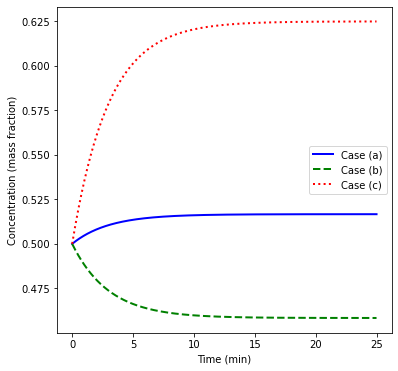

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Parameters
p = 900 #Density of the liquid (kg/m3)

#Define initial conditions
V0, x0, w10, w20, x10, x20 = 2, 0.5, 500, 200, 0.4, 0.75

#Derivative
def dxdt(x, t, w1, w2, x1, x2):
    """
    Returns the value of dxdt = f(x, w1, w2, w, x1, x2).
    
    x - outlet concentration (mass fraction)
    x1, x2 - inlet concentrations (mass fraction)
    w - outlet mass flowrate (kg/min)
    w1, w2 - inlet flowrates (kg/min)
    """
    w = w1 + w2
    dxdt = (x1*w1 + x2*w2 - x*w)/(p*V0)
    return dxdt

#Define the time grid
t = np.linspace(0, 25, 1000)

#Define the new values of w1, w2, and x1:
w1, w2, x1 = 400, 100, 0.6

#Solve the differential equation
x_a = odeint(dxdt, x0, t, args=(w1, w20, x10, x20)) #Case (a) w1 changes from 500 to 400
x_b = odeint(dxdt, x0, t, args=(w10, w2, x10, x20)) #Case (b) w2 changes (instead of w1) from 200 to 100
x_c = odeint(dxdt, x0, t, args=(w10, w2, x1, x20))#Case (c) x1 changes from 0.4 to 0.6 in addition to the change in w2

#Plot the solutions for analysis
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))
ax.plot(t, x_a, 'b-', linewidth = 2, label = "Case (a)")
ax.plot(t, x_b, 'g--', linewidth = 2, label = "Case (b)")
ax.plot(t, x_c, 'r:', linewidth = 2, label = "Case (c)")
ax.set_xlabel("Time (min)")
ax.set_ylabel("Concentration (mass fraction)")
ax.legend()
plt.show()

## Problem 2 - Electrically Heated Stirred Tank

Consider the stirred-tank heating system shown below. The liquid inlet stream consists of a single component with a mass flow rate of $w_i$ and an inlet temperature $T_i$. The tank contents are agitated and heated using an electrical heater that provides a heating rate $Q$. A dynamic model will be developed based on the following assumptions:
1. Perfect mixing; thus, the exit temperature $T$ is also the temperature of the tank contents.
2. Constant liquid holdup
3. The density $\rho$ and heat capacity $C$ of the liquid are assumed to be constant. Thus, their temperature dependence is neglected.
4. Heat losses are negligible.
5. The metal heating element has a significant thermal capacitance and that the electrical heating rate $Q$ directly affects the temperature of the element rather than the heating element.
6. Temperature gradients in the heating element resulting from heat conduction are neglected; the element has a uniform temperature, $T_e$.

![Prob2-schematic](images\Prob2-schematic.jpg)

After developing the model, consider the special case where the process design and operating conditions are characterized by the following four parameter groups,

$$
\begin{equation*}
    \begin{aligned}
        \frac{m}{w} &= 10~\text{min}\\
        \frac{m_eC_e}{wC} &= 1.0~\text{min}
    \end{aligned}
    \qquad
    \begin{aligned}
        \frac{m_eC_e}{h_eA_e} &= 1.0~\text{min}\\
        \frac{1}{wC} &= 0.05~^\circ\text{C-min/kcal},
    \end{aligned}
\end{equation*}
$$

and the nominal values of $Q$ and $T_i$ are

$$
\begin{equation*}
    \bar{Q} = 5000~\text{kcal/min}
    \qquad
    \bar{T}_i = 100~^\circ\text{C}.
\end{equation*}
$$

Do the following:
1. Calculate the nominal steady-state temperature, $\bar{T}$.
2. Assume that the process is initially at the steady state determined in part 1. Calculate the response, $T(t)$, to a sudden change in $Q$ from $5000$ to $5400~\text{kcal/min}$. Plot the temperature response.
3. Suppose that it can be assumed that the term $m_eC_e/h_eA_e$ is small relative to other terms. Calculate the response $T(t)$ for the conditions of part 2, using a first-order differential equation approcimation. Plot $T(t)$ on the graph for part 2.
4. What can we conclude about the accuracy of the approximation for part 3?

### Conservation Equations

We start with writing the energy balance for the heat transfer between the heating element and the contents of the tank

$$
\frac{dU}{dt} = -Q_{\text{conv}} + Q.
$$

Where $Q_{\text{conv}}$ is the net rate of heat transfer by convection, and $Q$ is an input variable, the thermal equivalent of the instantaneous electric power dissipation in the heating element (i.e., the heat transferred to the element when you power up the device with electricity). Now, by Newton's law of cooling, $Q_{\text{conv}}$ is equal to $h_eA_e\left(T_e - T\right)$ where $h_e$ is the film coefficient and $A_e$ is the surface area where the transfer occurs. Furthermore, by assumption, we have the relation $U = m_eC_e\left(T_e - T_{\text{ref}}\right)$. Combining all these, the energy balance reduces to

$$
m_eC_e\frac{dT_e}{dt} = -h_eA_e\left(T_e - T\right) + Q \tag{1}
$$

Next, we set up the energy balance around the stirred tank heating process. We have

$$
\begin{aligned}
mC\frac{dT}{dt} &= Q_{\text{conv,in}} - Q_{\text{conv,out}}\\
&= w_iC\left(T_i - T_{\text{ref}}\right) + h_eA_e\left(T_e - T\right) - wC\left(T - T_{\text{ref}}\right) \\
&= wC(T_i - T) + h_eA_e\left(T_e - T\right).
\end{aligned}\tag{2}
$$

### Degrees of Freedom Analysis

$$
\begin{equation*}
    \begin{aligned}
        &5~\text{parameters}:\\
        &2~\text{equations}:\\
        &6~\text{variables}:
    \end{aligned}
    \qquad
    \begin{aligned}
        &m_e, C_e, C, h_e, A_e\\
        &\text{Eq. (1)-(2)}\\
        &w, m, T, T_i, T_e, Q
    \end{aligned}
\end{equation*}
$$

The number of degrees of freedom is therefore $4$ ($N_F = 4$).

$$
\begin{equation*}
    \begin{aligned}
        &2~\text{outputs}:\\
        &4~\text{inputs}:
    \end{aligned}
    \qquad
    \begin{aligned}
        &T, T_e\\
        &T_i, w~\text{(disturbance)};~Q, m~\text{(manipulated)}
    \end{aligned}
\end{equation*}
$$

### Simplifications to the Model

We can just leave the system of equations as it is. However, considering that we will utilize the Laplace transform method in our analysis, it is a good idea to turn the model into a single second order differential equation; I've been doing solely this method in the past few months that I forgot the previous ones that I learned (hehe), especially the one involving eigenvalues.

Solving for $T_e$ in **Eq. (2)** we get

$$
T_e = T + \frac{mC}{h_eA_e}\frac{dT}{dt} - \frac{wC}{h_eA_e}\left(T_i - T\right),
$$

and differentiating this equation gives

$$
\begin{aligned}
    \frac{dT_e}{dt} &= \frac{dT}{dt} + \frac{mC}{h_eA_e}\frac{d^2T}{dt^2} - \frac{wC}{h_eA_e}\left(\frac{dT_i}{dt} - \frac{dT}{dt}\right)\\
    &= \frac{mC}{h_eA_e}\frac{d^2T}{dt^2} + \left(1 + \frac{wC}{h_eA_e}\right)\frac{dT}{dt} - \frac{wC}{h_eA_e}\frac{dT_i}{dt}
\end{aligned}
$$

Finally, we substitute the expression for $T_e$ and $dT_e/dt$, obtained above, to **Eq. (1)**:

$$
\begin{aligned}
    m_eC_e\left[\frac{mC}{h_eA_e}\frac{d^2T}{dt^2} + \left(1 + \frac{wC}{h_eA_e}\right)\frac{dT}{dt} - \frac{wC}{h_eA_e}\frac{dT_i}{dt}\right] &= -h_eA_e\left(T_e - T\right) + Q\\
    &= -h_eA_e\left[\frac{mC}{h_eA_e}\frac{dT}{dt} - \frac{wC}{h_eA_e}\left(T_i - T\right)\right] + Q\\
    &= -mC\frac{dT}{dt} + wC\left(T_i - T\right) + Q
\end{aligned}
$$

The simplified (second-order) model is then:

$$
\frac{m}{w}\frac{m_eC_e}{h_eA_e}\frac{d^2T}{dt^2} + \left(\frac{m_eC_e}{wC} + \frac{m_eC_e}{h_eA_e} + \frac{m}{w}\right)\frac{dT}{dt} + T = \frac{m_eC_e}{h_eA_e}\frac{dT_i}{dt} + T_i + \frac{1}{wC}Q
$$

### Using the Model

#### Part (a)
First we substitute the values of the group parameters into the model. This gives

$$
10\frac{d^2T}{dt^2} + 12\frac{dT}{dt} + T = \frac{dT_i}{dt} + T_i + \frac{1}{20}Q
$$

At steady-state, we have:

$$
\begin{aligned}
    &10\frac{d^2\bar{T}}{dt^2} + 12\frac{d\bar{T}}{dt} + \bar{T} = \frac{d\bar{T_i}}{dt} + \bar{T_i} + \frac{1}{20}\bar{Q}\\
    \Longrightarrow~ &\bar{T} = \bar{T_i} + \frac{1}{20}\bar{Q}\\
    \Longrightarrow~ &\bar{T} = 100 + \frac{5000}{20}\\
    \Longrightarrow~ &\bar{T} = 350~^\circ\text{C}
\end{aligned}
$$

#### Part (b)

The corresponding initial value problem, which will be solved using the Laplace transform method, is

$$
10\frac{d^2T(t)}{dt^2} + 12\frac{dT(t)}{dt} + T(t) = 350 + 20u(t-40)\\
~\\
0 \leq t \leq 80\\
~\\
\left.\frac{dT(t)}{dt}\right|_{t=0} = 0, \quad T(0) = 350
$$

The subsidiary equation is

$$
\left(10s^2 + 12s + 1\right)Y(s) = 350(10s + 12) + 350\frac{1}{s} + 20\frac{e^{-40s}}{s},
$$

which has the solution

$$
Y(s) = 350\frac{1}{s} + 20\left[\frac{1}{s} - \frac{s+\frac{3}{5}}{\left(s+\frac{3}{5}\right)^2 - \frac{13}{50}} - \frac{6\sqrt{26}}{26}\frac{\sqrt{26}/10}{\left(s+\frac{3}{5}\right)^2 - \frac{13}{50}}\right]e^{-40s}
$$

The solution to the initial value problem, the response $T(t)$, is therefore:

$$
\begin{equation*}
T(t)=
    \begin{cases}
        350 & \text{if } t < 40\\
        350 + 20\left(1-\left(\cosh{\frac{\sqrt{26}}{10}(t-40)} + \frac{6\sqrt{26}}{26}\sinh{\frac{\sqrt{26}}{10}(t-40)}\right)e^{-\frac{3}{5}(t-40)}\right) & \text{if } t > 40
    \end{cases}
\end{equation*}
$$

#### Part (c)

When the terms containing the factor $m_eC_e/h_eA_e$ are significantly smaller than the other, the equation becomes

$$
11\frac{dT(t)}{dt} + T(t) = 350 + 20u(t-40)
$$

which is a first-order approximation for the original model.

*Initial value problem*

$$
11\frac{dT(t)}{dt} + T(t) = 350 + 20u(t-40)\\
~\\
0 \leq t \leq 80\\
~\\
T(0) = 350
$$

*Subsidiary equation*

$$
\left(11s + 1\right)Y(s) = 3850 + 350\frac{1}{s} + 20\frac{e^{-40s}}{s}
$$

*Solution to subsidiary equation*

$$
Y(s) = 350\frac{1}{s} + 20\left(\frac{1}{s} - \frac{1}{s+\frac{1}{11}}\right)e^{-40s}
$$

*Solution*

$$
\begin{equation*}
    T(t)=
    \begin{cases}
    350 & \text{if } t < 40\\
    350 + 20\left(1-e^{-(t-40)/11}\right) &\text{if } t > 40
    \end{cases}
\end{equation*}
$$

The following code solves the IVPs and plots the results (both for the second-order and first order models):

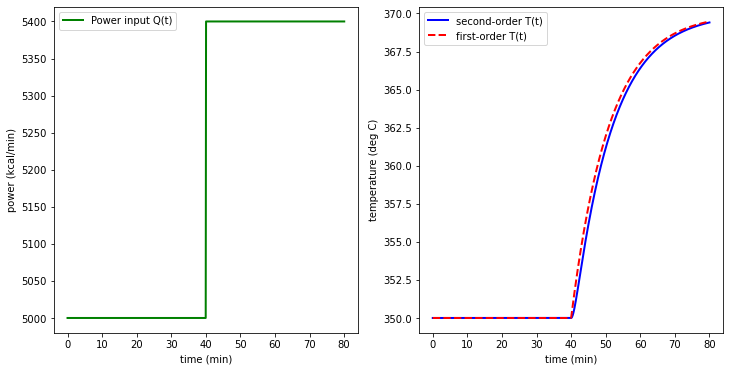

In [11]:
from sympy import *
import sympy as sp
sp.init_printing()

t = sp.symbols('t', real=True, positive=True)
s = sp.symbols('s')
a = sp.symbols('a', real=True, positive=True)

def invL(F):
    return sp.inverse_laplace_transform(F,s,t)

#Parameters
g1 = 10 #m/w (min)
g2 = 1 #meCe/heAe (min)
g3 = 1 #meCe/wC (min)
g4 = 1/20 #1/wC (degC-min/kcal)
Tiss = 100.0 #nominal value of the feed temperature Ti (deg C)
Qss = 5000.0 #nominal value of electric power Q (kcal/min)

#input (driving force)
r_ = 350.0 + 20*sp.Heaviside(t-40)

#time interval
a = np.linspace(0,80,800)

#initial conditions
dT0 = 0
T0 = 350

#Subsidiary Equations
Q1 = 1/(g1*g2*(s**2) + (g1 + g2 + g3)*s + 1)
Q2 = 1/((g1 + g3)*s + 1)

R = sp.laplace_transform(r_,t,s,noconds=true)

S1 = dT0 + (g1*g2*s + (g1 + g2 + g3))*T0
S2 = (g1 + g3)*T0

Y1 = S1*Q1 + R*Q1
Y2 = S2*Q2 + R*Q2

#Solutions
T1_ = invL(Y1)
T2_ = invL(Y2)

#input Q
Q = np.ones(len(a))*5000
Q[400:] = 5400

#Lambdified solutions
T1 = lambdify(t, T1_, "numpy")
T2 = lambdify(t, T2_, "numpy")

#Plot
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

ax[0].plot(a,Q,'g-', linewidth=2, label="Power input Q(t)")
ax[0].set_xlabel('time (min)')
ax[0].set_ylabel('power (kcal/min)')
ax[0].legend()

ax[1].plot(a,T1(a),'b-',linewidth=2, label='second-order T(t)')
ax[1].plot(a,T2(a),'r--',linewidth=2, label='first-order T(t)')
ax[1].set_xlabel('time (min)')
ax[1].set_ylabel('temperature (deg C)')
ax[1].legend()

plt.show()

## Problem 3 - CSTR with Heat Exchange

Consider a simple liquid-phase, irreversible chemical reaction, $\text{A}\to\text{B}$, that takes place in a CSTR. The schematic diagram is as follows.

![Prob4-fig1](./images/Prob4-fig1.jpg)

The goal is to derive a dynamic model that describing the exit temperature $T$ and exit concentration $c_A$ under the following assumptions:

1. The CSTR is perfectly mixed.
2. The mass densities of the feed and product streams are equal and constant, and is denoted by $\rho$.
3. The liquid volume $V$ in the reactor is kept constant by an overflow line.
4. The reaction follows a first-order rate law, $-r_A = kc_A$
5. The thermal capacitances of the coolant and the cooling coil wall are negligible compared to that of the liquid in the tank.
6. All of the coolant is at a uniform temperature, $T_c$. (The temperature gradient from the coolant and the coil wall exposed to the liquid is neglected)
7. The rate of heat transfer from the reactor contents to the coolant is given by $ Q = UA(T_c - T) $ where $U$ is the overall heat transfer coefficient and $A$ is the heat transfer area. Both of these model parameters are assumed to be constant.
8. The enthalpy change associated with the mixing of the feed and the liquid in the tank is negligible compared with the enthalpy change for the chemical reaction. In other words, the heat of mixing is negligible compared to the reaction.
9. Shaft work and heat losses to the ambient can be neglected.
10. kinetic, potential, and other energies corresponding to each stream (except the internal energy) are neglected.

Then, a simulation is to be made on the effect of a step change in coolant temperature in the positive and negative directions. The table below shows the parameters and nominal operating condition for the CSTR.

| Parameter     | Value                       | Parameter | Value                               |
| :-----------: | :-------------------------- | :-------: | :---------------------------------- |
| $q$           | $100~\text{L/min}$          | $E/R$     | $8750~\text{}$                      |
| $c_{Ai}$      | $1~\text{mol/L}$            | $k_0$     | $7.2\times 10^{10}~\text{min}^{-1}$ |
| $\tau_i$      | $350~\text{K}$              | $UA$      | $5\times 10^4~\text{J/min-K}$       |
| $V$           | $100~\text{L}$              | $T_c(0)$  | $300~\text{K}$                      |
| $\rho$        | $1000~\text{g/L}$           | $c_A(0)$  | $0.5~\text{mol/L}$                  |
| $C$           | $0.239~\text{J/g-K}$        | $T(0)$    | $350~\text{K}$                      |
| $-\Delta H_R$ | $5\times 10^4~\text{J/mol}$ | $~$       | $~$                                 |

Two cases are to be simulated, one based on increases cooling by changing $T_c$ from $300~\text{K}$ to $290~\text{K}$ and one reducing the cooling rate by increasing $T_c$ from $300~\text{K}$ to $305~\text{K}$. The model equations are to be solved over a 10-minute horizon.

### Modelling Objectives and End Use

The liquid phase, irreversible chemical reaction $\text{A} \to \text{B}$ in a CSTR with heat exchange will be modelled under the above assumptions. This model will then be used to study the transient response of the temperature $T(t)$ and concentration $c_A(t)$ of the liquid in the tank on step changes in coolant temperature.

### Conservation Equations

#### Species Balance

For each of the species and energy balances, we start with the general statement, and then derive the model equation, noting the assumptions along the way. Starting with the species balance, the general statement is

$$
\begin{equation*}
    \left[
    \begin{aligned}
        &\text{Rate of flow}\\
        &\text{of}~j~\text{into}\\
        &\text{the system}\\
        &\text{(moles/time)}
    \end{aligned}
    \right]
    -
    \left[
    \begin{aligned}
        &\text{Rate of flow}\\
        &\text{of}~j~\text{out of}\\
        &\text{the system}\\
        &\text{(moles/time)}
    \end{aligned}
    \right]
    +
    \left[
    \begin{aligned}
        &\text{Rate of generation}\\
        &\text{of}~j~\text{by chemical}\\
        &\text{reaction within}\\
        &\text{the system}\\
        &\text{(moles/time)}
    \end{aligned}
    \right]
    =
    \left[
    \begin{aligned}
        &\text{Rate of}\\
        &\text{accumulation}\\
        &\text{of}~j~\text{within}\\
        &\text{the system}\\
        &\text{(moles/time)}
    \end{aligned}
    \right]
\end{equation*}
$$

In mathematical symbols, we can write this as

$$
F_{ji} - F_{i} + G_j = \frac{dN_j}{dt}
$$

where $F_{j0},F_{j}$ are the inlet and outlet molar flowrates of species $i$, respectively; $G_j$ is the rate of generation of component $i$ within the system; and $N_j$ is the number of moles of species $j$ within the system. Due to the perfect mixing assumption, the concentration of each species $i$ within the system is equal to the outlet concentration of $j$, $c_j|_{\text{out}} = c_j|_{\text{sys}}$. Furthermore, because the system volume $V$ is constant, we have $q_{i} = q$. Combining all these, we get the species balance for species $\text{A}$ and $\text{B}$:

$$
\boxed
{
    \begin{aligned}
    V\frac{dc_j}{dt} &= q\left(c_ji - c_j\right) + \nu_j k c_A V \qquad (j=\text{A, B})\\
    k &= k_0e^{-E/RT}
    \end{aligned}
}
\tag{1}
$$

#### Energy Balance

The general statement is

$$
\begin{equation*}
    \left[
    \begin{aligned}
        &\text{Rate of}\\
        &\text{accumulation}\\
        &\text{of energy}\\
        &\text{within the}\\
        &\text{system}
    \end{aligned}
    \right]
    =
    \left[
    \begin{aligned}
        &\text{Rate of flow}\\
        &\text{of heat to}\\
        &\text{the system}\\
        &\text{from the}\\
        &\text{surroundings}
    \end{aligned}
    \right]
    -
    \left[
    \begin{aligned}
        &\text{Rate of work}\\
        &\text{of done by}\\
        &\text{the system}\\
        &\text{on the}\\
        &\text{surroundings}
    \end{aligned}
    \right]
    +
    \left[
    \begin{aligned}
        &\text{Rate of energy}\\
        &\text{added to the}\\
        &\text{system by mass}\\
        &\text{flow into the}\\
        &\text{system}
    \end{aligned}
    \right]
    -
    \left[
    \begin{aligned}
        &\text{Rate of}\\
        &\text{energy leaving}\\
        &\text{the system by mass}\\
        &\text{flow out of the}\\
        &\text{system}
    \end{aligned}
    \right]
\end{equation*}
$$

which in mathematical symbols could be written as

$$
\frac{d\hat{E}_{\text{sys}}}{dt} = \dot{Q} - \dot{W} + \left.\sum_{i}{E_iF_i}\right\rvert_{\text{in}} - \left.\sum_{i}{E_iF_i}\right\rvert_{\text{out}}
$$

where $\hat{E}_{\text{sys}}$ is the total energy of the system, and $E_i$ is the specific energy carried by species $i$. 

##### The Work Term

The work term $\dot{W}$ can be divided into two terms: flow work, and shaft work. Flow work is the work necessary to get the mass into and out of the system; shaft work is the work by the system coming from equipments such as turbines and stirrers.

$$
\dot{W} = \underbrace{-\left.\sum_{i}{F_iP\tilde{V_i}}\right\rvert_{\text{in}} + \left.\sum_{i}{F_iP\tilde{V_i}}\right\rvert_{\text{out}}}_{\text{flow work}} + \underbrace{W_s}_{\text{shaft work}}
$$

here, $\tilde{V_i}$ is the specific molar volume of species $i$; and since shaftwork is neglected, the last term is cancelled out. Hence, the energy balance simplifies to

$$
\frac{d\hat{E}_{\text{sys}}}{dt} = \dot{Q} + \left.\sum_{i}{F_i\left(E_i + P\tilde{V_i}\right)}\right\rvert_{\text{in}} - \left.\sum_{i}{F_i\left(E_i + P\tilde{V_i}\right)}\right\rvert_{\text{out}}
$$

##### The Energy Term

The energy term $E_i$ is a combination of the internal energy $U_i$, kinetic energy, potential energy, and other energies such as electric and magnetic. It can be expressed as

$$
E_i \equiv U_i + \frac{u_i^2}{2} + gz_i + \text{other}
$$

By the last assumption made, this simplifies to

$$
E_i = U_i
$$

Furthermore, we have the relation $H_i \equiv U_i + PV_i$. Combining all these, our energy balance becomes

$$
\frac{d\hat{E}_{\text{sys}}}{dt} = \dot{Q} + \left.\sum_{i}{F_iH_i}\right\rvert_{\text{in}} - \left.\sum_{i}{F_iH_i}\right\rvert_{\text{out}}
$$

##### System Energy

To dissect the system energy $\hat{E}_{\text{sys}}$, we note that it is the sum of the products of the specific energies of the species and the number of moles; that is, we have

$$
\begin{aligned}
    \hat{E}_{\text{sys}} 
    &= \sum_{i}{\left(H_i-P\tilde{V}_i\right)N_i}\\
    &= \sum_{i}{H_iN_i} - P\sum_{i}{\tilde{V}_iN_i}\\
    &= \sum_{i}{H_iN_i} - PV
\end{aligned}
$$

Often this $PV$ term is virtually smaller than the other terms, and thus wil be neglected for this problem. Taking the time derivative of $\hat{E}_{\text{sys}}$, we get

$$
\begin{aligned}
    \frac{d\hat{E}_{\text{sys}}}{dt} 
    &= \frac{d}{dt}\left(\sum_{i}{H_iN_i}\right)\\
    &= \sum_{i}{H_i\frac{dN_i}{dt}} + \sum_{i}{N_i\frac{dH_i}{dt}}\\
    &= \sum_{i}{H_i\frac{dN_i}{dt}} + \sum_{i}{N_i\frac{dH_i}{dt}}
\end{aligned}
$$

But we know that

$$
\frac{dN_i}{dt} = F_i|_{\text{in}}-F_i|_{\text{out}}-\nu_ir_AV,
$$

and that the temperature dependence of enthalpy $H_i(T)$ can be defined by the formula 

$$
H_i(T) \equiv H_i^\circ(T_R) + \int_{T_R}^{T}{C_p}~dT
$$

which by the constant heat capacity assumption simplifies to

$$
H_i(T) = H_i^\circ(T_R) + C_i\left(T - T_R\right).
$$

Thus, the expression for the time derivative simplifies to

$$
\frac{d\hat{E}_{\text{sys}}}{dt} = \sum_{i}{H_iF_i|_{\text{in}}}-\sum_{i}{H_iF_i|_{\text{out}}} - \left(-r_A\right)V\left(-\Delta H_R\right) + \rho V C\frac{dT}{dt}
$$

where $-\Delta H_R \equiv \sum_{i}{\nu_iH_i}$ is the heats of reaction, and $\rho V C \equiv \sum_{i}{N_iC_i}$ is the system's thermal capacitance. Substituting this expression for $d\hat{E}_{\text{sys}}/dt$ in the energy balance, we get

$$
\rho V C\frac{dT}{dt} = \dot{Q} + wC(T|_{\text{in}}-T) - wC(T|_{\text{out}}-T) + \left(-r_A\right)V\left(-\Delta H_R\right)
$$

where $\rho qC \equiv \sum_{i}{F_iC_i}$ is the inlet (and outlet) thermal capacitance. Now, because there is perfect mixing, $T|_{\text{out}}=T$; so we can further simplify this to

$$
\boxed{\rho V C\frac{dT}{dt} = UA(T_c - T) + \rho qC(Ti-T) + kVc_A\left(-\Delta H_R\right)}
$$

where we have applied the assumption that $\dot{Q} = UA(T_c-T)$, and that $-r_A = kc_A$. This is the simplest form of the energy balance.

### Degrees of Freedom Analysis

|              |                                      |
| :----------- | :----------------------------------: |
| 6 parameters | $k_0, E/R, \rho, C, -\Delta H_R, UA$ |
| 2 equations  | $\text{eqns.}~(1)-(2)$               |
| 7 variables  | $V, c_A, c_{Ai}, q, T, T_c, T_i$     |

Thus, there are 5 degrees of freedom $\left(N_F = 5\right)$.

|                       |                  |
| :-------------------- | :--------------: |
| 2 outputs             | $c_A, T$         |
| 3 distrubance inputs  | $c_{Ai}, T_i, q$ |
| 2 manipulated inputs  | $V, T_c$         |

### Simulation

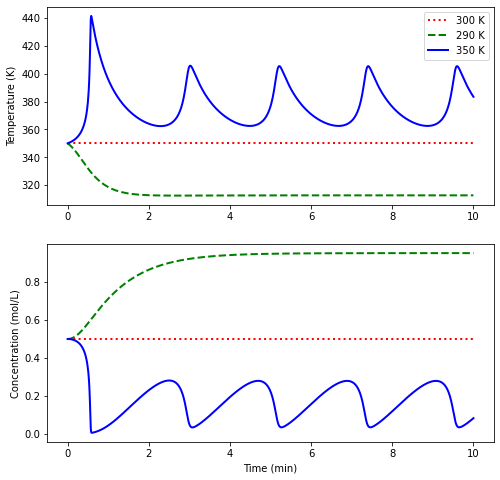

In [12]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt

# Define parameters
k0 = 7.2e+10 #Pre-exponential factor for the Arrhenious equation (1/min)
E_R = 8750 #Activation energy divided by the universal gas constant
p = 1000 #Liquid density (g/L)
C = 0.239 #Liquid heat capacity (J/g-K)
Hrxn = 5.0e+4 #Negative of the heat of reaction (J/mol)
UA = 5.0e+4 #Overall heat transfer coefficient times the heat transfer surface area (J/min-K)

# Define system of differential equations
def dydt(y, t, Tc, Ti, cai, q, V):
    """
    Return the value of dydt at time t. Here, is the response vector y=[y1,y2] with y1 = cA(t), y2 = T(t).

    Inputs:
    cai - Inlet concentration of A (mol/L)
    q - Outlet (and inlet) flowrate (L/m)
    V - Volume of liquid in the CSTR (L)
    Tc - Temperature of the coolant (K)
    Ti - Inlet temperature (K)
    """

    y1, y2 = y
    dy1dt = (q/V)*(cai - y1) - k0*y1*np.exp(-E_R/y2)
    dy2dt = (UA/(p*V*C))*(Tc - y2) + (q/V)*(Ti - y2) + ((k0*Hrxn)/(p*C))*y1*np.exp(-E_R/y2)
    return dy1dt, dy2dt

# Define operating conditions (initial conditions)
ca0, T0, Tc0, cai0, q0, V0 = 0.5, 350, 300, 1, 100, 100
Ti0 = T0 + (-(UA/(p*V0*C))*(Tc0 - T0) - ((k0*Hrxn)/(p*C))*ca0*np.exp(-E_R/T0))/(q0/V0)

# Time gird
t = np.linspace(0, 10, 1000)

#Integrate differential equations
y0 = ca0, T0
Tc1, Tc2 = 290, 305
y11, y12 = odeint(dydt, y0, t, args=(Tc1, Ti0, cai0, q0, V0)).T
y21, y22 = odeint(dydt, y0, t, args=(Tc2, Ti0, cai0, q0, V0)).T

#Temperature vs time plot
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (8,8))
axes[0].plot(t, np.ones(len(t))*T0,'r:', linewidth=2, label="300 K")
axes[0].plot(t, y12,'g--', linewidth=2, label="290 K")
axes[0].plot(t, y22,'b-', linewidth=2, label="350 K")
axes[0].set_ylabel('Temperature (K)')
axes[0].legend()

axes[1].plot(t, np.ones(len(t))*ca0, 'r:', linewidth=2, label="300 K")
axes[1].plot(t, y11, 'g--', linewidth=2, label="290 K")
axes[1].plot(t, y21, 'b-', linewidth=2, label="305 K")
axes[1].set_ylabel('Concentration (mol/L)')
axes[1].set_xlabel('Time (min)')
plt.show()